<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-and-prepare-dataset" data-toc-modified-id="Get-and-prepare-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get and prepare dataset</a></span></li><li><span><a href="#Build-and-train-the-model" data-toc-modified-id="Build-and-train-the-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build and train the model</a></span><ul class="toc-item"><li><span><a href="#Scale-target" data-toc-modified-id="Scale-target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scale target</a></span></li><li><span><a href="#Split-data-set" data-toc-modified-id="Split-data-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split data set</a></span></li><li><span><a href="#Adjust-the-parameters-of-the-model" data-toc-modified-id="Adjust-the-parameters-of-the-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Adjust the parameters of the model</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Check-the-parameters-of-the-best-model" data-toc-modified-id="Check-the-parameters-of-the-best-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Check the parameters of the best model</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#preprocessing and model selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, train_test_split, cross_val_score

#regression model metrics
from sklearn.metrics import mean_squared_error, r2_score

#regression models
from sklearn.svm import LinearSVR

## Get and prepare dataset

In [2]:
#download the dataset take 4 columns by the link
path = 'https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/bdfc59ed-c3c7-48ac-a3d3-9e54663f6c1d.csv'
target = 'SalePrice'
df = pd.read_csv(path)
#df = df[["OverallQual","GrLivArea", 'Neighborhood', "SalePrice"]]
df = df[['LotArea', 'OverallQual', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'Functional', 'SaleType', 'SaleCondition', "SalePrice"]]


In [3]:
#check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   OverallQual    1460 non-null   int64  
 2   1stFlrSF       1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   GrLivArea      1460 non-null   int64  
 9   FullBath       1460 non-null   int64  
 10  TotRmsAbvGrd   1460 non-null   int64  
 11  Fireplaces     1460 non-null   int64  
 12  GarageCars     1460 non-null   int64  
 13  GarageArea     1460 non-null   int64  
 14  MSZoning       1460 non-null   object 
 15  LotShape       1460 non-null   object 
 16  LandContour    1460 non-null   object 
 17  Neighborhood   1460 non-null   object 
 18  Conditio

In [4]:
#separate target from features
X = df.drop(columns = [target])
y = df[[target]]

## Build and train the model

In [5]:
#create Pipeline with transformation + model

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(
    strategy='most_frequent')), ('scaler', StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')
            ), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(
    columns=[target]).columns
categorical_features = df.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

print(categorical_features)
print(numeric_features)
lsvr = Pipeline(steps=[('preprocessor', preprocessor),                       
                      ('regressor', LinearSVR())])

Index(['MSZoning', 'LotShape', 'LandContour', 'Neighborhood', 'Condition1',
       'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'KitchenQual', 'Functional',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['LotArea', 'OverallQual', '1stFlrSF', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea'],
      dtype='object')


### Scale target

In [6]:
y_scaler = StandardScaler() #(n,1)
y_scaler.fit(y) # mean, std ->
y = y_scaler.transform(y)

### Split data set

In [7]:
#split data set on test and train data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y.ravel(),
                                                    test_size=0.25,
                                                    random_state=1)

### Adjust the parameters of the model 

In [22]:
#parameters for pipeline model
paramsLinearSVR = \
{
 'regressor__C': [float(i)*0.3+0.1 for i in range(40)],
 #'regressor__dual': [True],
 #'regressor__epsilon': [0.0],
 #'regressor__fit_intercept': [True],
 #'regressor__intercept_scaling': [1.0],
 #'regressor__loss': ['epsilon_insensitive'],
 'regressor__max_iter': [ 1000*float(i+1) for i in range(10)],
 #'regressor__random_state': [19],
 'regressor__tol': [0.1],
 #'regressor__verbose': [0],

}

### Train model 

In [23]:
#cross validation
cv1 = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)

Grid = RandomizedSearchCV(lsvr, paramsLinearSVR, n_iter = 10, scoring='r2', cv=cv1)
Grid.fit(X_train, y_train.ravel()) #(n,1) -> (n,)
best_model = Grid.best_estimator_

/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Converge

/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/smirnova/apps/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [24]:
Grid.cv_results_

{'mean_fit_time': array([0.25724847, 0.15502293, 0.08146331, 0.353499  , 0.13709962,
        0.17449674, 0.32966294, 0.11077874, 0.15206364, 0.33616223]),
 'std_fit_time': array([0.04805229, 0.02029129, 0.0127235 , 0.06743759, 0.01605717,
        0.02757621, 0.09526335, 0.02565394, 0.05052833, 0.05897348]),
 'mean_score_time': array([0.00739862, 0.01043081, 0.01042963, 0.01190161, 0.01037703,
        0.00988333, 0.01111355, 0.00934038, 0.01558346, 0.01219748]),
 'std_score_time': array([0.00146593, 0.00273754, 0.00226545, 0.00290106, 0.00116703,
        0.00173386, 0.00337556, 0.00211274, 0.00555923, 0.00281875]),
 'param_regressor__tol': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_regressor__max_iter': masked_array(data=[5000.0, 5000.0, 2000.0, 8000.0, 5000.0, 5000.0, 3000.0,
               

### Check the parameters of the best model

In [25]:
#check the parameters of the best model
best_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['LotArea', 'OverallQual', '1stFlrSF', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageA...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Lo

## Results

Metrics of y_test prediction:
MSE: 776375456.014459
RMSE: 27863.51478213865
R2: 0.8843513952480021


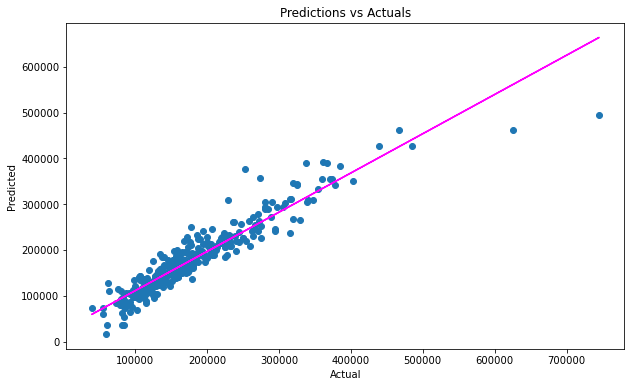

In [26]:
y_pred_scaled = best_model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
y_test_real = y_scaler.inverse_transform(y_test.reshape(-1,1))
y_test_real = y_test_real.ravel()

# Show metrics
print('Metrics of y_test prediction:')
mse = mean_squared_error(y_test_real, y_pred.ravel())
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test_real, y_pred.ravel())
print("R2:", r2)
# Plot predicted vs actual



fig = plt.figure(figsize = (10,6))
plt.scatter(y_test_real.ravel(), y_pred.ravel())
plt.xlabel(f'Actual')
plt.ylabel(f'Predicted')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test_real.ravel(), y_pred.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_real.ravel(), p(y_test_real.ravel()), color='magenta')
plt.show()
    